## 1 - Packages 
Let's run the cell below to import all the packages that we will need during the assignment. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2 - Initializing
Let's initialize the parameters and bias with 1 as refered in the assignment.

In [2]:
def init_parameters(dim):
  w = np.ones(shape=(dim, 1),dtype=float)
  b = 1.0
  return w,b

## 3 - Sigmoid function


In [3]:
def sigmoid(Z):
  s = 1/(1+np.exp(-Z))
  return s

## 4 - cost function


In [4]:
def compute_cost(A, Y):
  return -(np.dot(Y, np.log(A).T) + np.dot(1-Y, np.log(1-A).T)) / Y.shape[1]

## 5 - Forward pass


In [5]:
def forward_pass(w, b,x_train, y_train):
  Z = np.dot(w.T, x_train) + b
  # print(f"w = {w} ---- > w' = {w.T}, b = {b}")
  # print(f"\n x_batch = {x_train}")
  # print(f"\n --------> w' . x_batch + b = {Z}")
  # print(f"\n --------> Z = {Z}]")
  A = sigmoid(Z)
  # print(f"\n --------> A = sigmoid(Z) = {A} \n")
  return A


## 6 - BackPropagation


In [6]:
def back_propagation(A, x_train, y_train):
  m = y_train.shape[1]
  # print(f"\nA = {A}")
  # print(f"y_batch = {y_train}")
  # print(f"x_batch = {x_train}")
  dZ = A - y_train
  # print(f"\ndZ = A - y_batch = {dZ}")
  db = np.mean(dZ)
  # print(f"\ndb = (1/2) np.sum(dZ) = {db} ")
  dw = np.dot(x_train, dZ.T)/ m
  # print(f"\ndw =1/2 (x_batch . dZ = ') { dw } \n")
  return dw, db

## 7 - Propagation

In [7]:
def propagate(w, b, x_train, y_train):
  A = forward_pass(w,b,x_train,y_train)
  dw, db = back_propagation(A, x_train, y_train)
  cost = compute_cost(A, y_train)
  grads = {"dw":dw,
           "db":db}
  return grads, cost

## 8 - Dataset

In [8]:
x_train = np.array([[22,25,47,52,46,56,55,60], 
                    [1,0,1,0,1,1,0,0]], dtype = np.float64)
y_train = np.array([0,0,1,0,1,1,0,1], dtype = np.float64).reshape(1,8)

x_train[0, :] *= .01
print("X = ")
print(x_train)

X = 
[[0.22 0.25 0.47 0.52 0.46 0.56 0.55 0.6 ]
 [1.   0.   1.   0.   1.   1.   0.   0.  ]]


## 9 - Creating batches

In [9]:
def create_mini_batchs(x_train, y_train, batch_size):
  batches = []
  for i in range(0, y_train.shape[1], batch_size):
    y_batch = y_train[:, i:i+batch_size]
    x_batch = x_train[:, i:i+batch_size]
    batches.append([x_batch, y_batch])
  return batches


## 10 - Prediction

In [10]:
def predict(w,b,X):
  m = X.shape[1]
  Y_prediction = np.zeros((1, m))
  w = w.reshape(X.shape[0], 1)
  A = sigmoid(np.dot(w.T,X)+b)
  for i in range(A.shape[1]):
    if A[0,i] > .5 :
      Y_prediction[0,i] = 1.0
    else:
      Y_prediction[0,i] = 0.0
      
  return Y_prediction

## 11 - Model

w =  [[0.9901807 ]
 [0.97744922]]

b = 0.9580167235780715 

cost in epoch 1 and batch [array([[0.22, 0.25],
       [1.  , 0.  ]]), array([[0., 0.]])] ----> 1.912517627913481 

w =  [[0.98058173]
 [0.97952692]]

b = 0.9397569346426939 

cost in epoch 1 and batch [array([[0.47, 0.52],
       [1.  , 0.  ]]), array([[1., 0.]])] ----> 0.8830430989624943 

w =  [[0.98265798]
 [0.98361602]]

b = 0.943846043069526 

cost in epoch 1 and batch [array([[0.46, 0.56],
       [1.  , 1.  ]]), array([[1., 1.]])] ----> 0.08532865629509048 

w =  [[0.97411103]
 [0.98361602]]

b = 0.9279027536376557 

cost in epoch 1 and batch [array([[0.55, 0.6 ],
       [0.  , 0.  ]]), array([[0., 1.]])] ----> 0.9419989440314482 

w =  [[0.96442613]
 [0.96128133]]

b = 0.886482970427297 

cost in epoch 2 and batch [array([[0.22, 0.25],
       [1.  , 0.  ]]), array([[0., 0.]])] ----> 1.839978382876785 

w =  [[0.95509229]
 [0.96355724]]

b = 0.8687521252396183 

cost in epoch 2 and batch [array([[0.47, 0.52],
       [1.

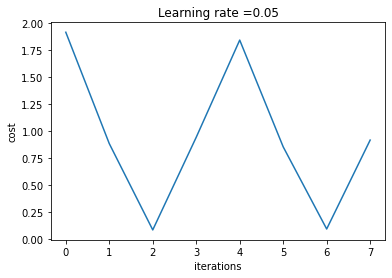

train accuracy: 50.0 %


In [11]:

epochs = 2
learning_rate = 0.05
batch_size = 2


w, b = init_parameters(x_train.shape[0])

costs = []

batches = create_mini_batchs(x_train,y_train,batch_size)

for i in range(epochs):
  for batch in batches:
    x_batch, y_batch = batch
    grads, cost = propagate(w,b, x_batch, y_batch)
    dw = grads["dw"]
    db = grads["db"]
    # print(f"\ncurrent w = {w}")
    w = w - learning_rate * dw
    print(f"w =  {w}")
    # print(f"\ncurrent b = {b}")
    b = b - learning_rate * db
    print(f"\nb = {b} \n")
    costs.append(cost)
    print(f'cost in epoch {i + 1} and batch {batch} ----> {float(cost)} \n')

plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

Y_prediction_train = predict(w,b, x_train)
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))

